## 1: Neuron - Building block for Neural network

In [2]:
import numpy as np

def sigmiod(x):
    return 1/(1+np.exp(-x))

class neuronn:
    def __init__(self,w1,w2,b):
        self.w1=w1
        self.w2=w2
        self.b=b
    def output(self,x1,x2):
        o1=sigmiod(self.w1*x1 + self.w2*x2 + self.b)
        return o1

<img src=Img/perceptron.svg>

In [3]:
N=neuronn(w1=0.5,w2=0.5,b=1)
N.output(1,2)

0.9241418199787566

## 2: Combining Neurons

In [4]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

class neurons:
    def __init__(self,w1,w2,w3,w4,w5,w6,b1,b2,b3):
        self.w1=w1
        self.w2=w2
        self.w3=w3
        self.w4=w4
        self.w5=w5
        self.w6=w6
        self.b1=b1
        self.b2=b2
        self.b3=b3
    def output(self,x1,x2):
        h1=sigmoid(self.w1*x1 + self.w2*x2 + self.b1)
        h2=sigmoid(self.w3*x2 + self.w4*x1 + self.b2)
        o1=sigmoid(self.w5*h1 + self.w6*h2 + self.b3)
        return o1

<img src=Img/network.svg>

In [14]:
Ns=neurons(0.5,0.5,0.5,0.5,0.5,0.5,1,1,1)
Ns.output(0.2,0.4)

0.8564158737658863

## 3: Training a Neural Network for our data

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
#y_pred and y_real are numpy array
#cost function represent mean squared error
def Cost(y_pred,y_real):    
    return ((y_pred-y_real)**2).mean()
def sigmoid(x):
    return 1/(1+np.exp(-x))
def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [177]:
class gender_predictor:
    def __init__(self):
        #chooses a random real number, more likely to be near 0.
        self.w1=np.random.normal()
        self.w2=np.random.normal()
        self.w3=np.random.normal()
        self.w4=np.random.normal()
        self.w5=np.random.normal()
        self.w6=np.random.normal()
        self.b1=np.random.normal()
        self.b2=np.random.normal()
        self.b3=np.random.normal()
        
    def feed_forward(self,x):
        h1=sigmoid(self.w1*x[0]+self.w2*x[1]+self.b1)
        h2=sigmoid(self.w3*x[0]+self.w4*x[1]+self.b2)
        o1=sigmoid(self.w5*h1+self.w6*h2+self.b3)
        return o1
        
    def neuron_update(self,X_all,y_real_all):
        Loss=[]
        a=0.01
        N=10000
        for n in range(N):
            for x,y_real in zip(X_all,y_real_all):
                Sum_h1=self.w1*x[0]+self.w2*x[1]+self.b1
                h1=sigmoid(Sum_h1)
                Sum_h2=self.w3*x[0]+self.w4*x[1]+self.b2
                h2=sigmoid(Sum_h2)
                Sum_o1=self.w5*h1+self.w6*h2+self.b3
                y_pred=sigmoid(Sum_o1)
                
                dCost_dypred = 2 * (y_pred - y_real)
                
                #3rd Neuron o1
                dypred_dw5 = d_sigmoid(Sum_o1) * h1
                dypred_dw6 = d_sigmoid(Sum_o1) * h2
                dypred_db3 = d_sigmoid(Sum_o1)
                
                #h1 and h2
                dypred_dh1 = d_sigmoid(Sum_o1) * self.w5
                dypred_dh2 = d_sigmoid(Sum_o1) * self.w6
                
                #1st Neuron h1
                dh1_dw1 = d_sigmoid(Sum_h1) * x[0]
                dh1_dw2 = d_sigmoid(Sum_h1) * x[1]
                dh1_db1 = d_sigmoid(Sum_h1)
                
                #2nd Neuron h2
                dh2_dw3 = d_sigmoid(Sum_h2) * x[0]
                dh2_dw4 = d_sigmoid(Sum_h2) * x[1]
                dh2_db2 = d_sigmoid(Sum_h2)
                
                #updating Values of w1,w2,w3,w4,w5,w6,b1,b2,b3 simultaneously
                self.w1 -= a* dCost_dypred * dypred_dh1 * dh1_dw1
                self.w2 -= a* dCost_dypred * dypred_dh1 * dh1_dw2
                self.w3 -= a* dCost_dypred * dypred_dh2 * dh2_dw3
                self.w4 -= a* dCost_dypred * dypred_dh2 * dh2_dw4
                self.w5 -= a* dCost_dypred * dypred_dw5
                self.w6 -= a* dCost_dypred * dypred_dw6
                
                self.b1 -= a* dCost_dypred * dypred_dh1 * dh1_db1
                self.b2 -= a* dCost_dypred * dypred_dh2 * dh2_db2
                self.b3 -= a* dCost_dypred * dypred_db3
                
            if n % (N/100) == 0:
                Loss.append(Cost(self.feed_forward(X_all.T),y_real_all))
        return Loss

### Data

In [189]:
#heights and weights are in cms and Kgs respectively
#[0,0] represent [164cms , 74 Kgs]
#gender 1 represent men
H_W=np.array([[  4., -12.],
           [ -8.,  11.],
           [  1., -10.],
           [  5.,   8.],
           [ -8., -18.],
           [-13.,  -7.],
           [ -7.,  19.],
           [ 14.,  21.],
           [ -6.,  -3.],
           [  0.,  -6.],
           [  5.,   6.],
           [  9., -14.],
           [  1., -14.],
           [ -6.,   4.],
           [ 17.,  21.]])
G=np.array([1,0,0,1,0,0,0,1,0,0,0,1,1,0,1])
X_all = H_W
y_real_all = G
GN=gender_predictor()
Loss=GN.neuron_update(X_all,y_real_all)

### Plotting Loss

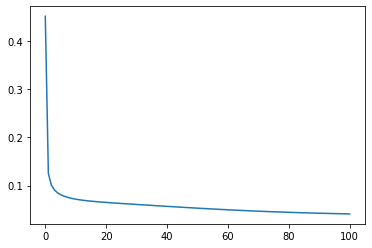

In [191]:
plt.plot(np.linspace(0,100,100),Loss)

### Input

In [198]:
(h0,w0)=int(data['height'].mean()),int(data['weight'].mean())
w=float(input("Weight(in Kgs)"))-w0
h=float(input("Height(in cms)"))-h0
g=GN.feed_forward([h,w])
if g>0.5:
    print("You are a Male")
    print("Probablity=",g)
else:
    print("You are a Female")
    print(" Probablity=",1-g)

Weight(in Kgs) 65
Height(in cms) 167


You are a Male
Probablity= 0.9708032939376948


### Data
###### Data source : https://www.kaggle.com/sulianova/eda-cardiovascular-data/data
###### Extracting only height, weight and gender feild.